## Calibrate the detector distance

Short before the experiment, it is recommended to calibrate the actual detector distance against the nominal motor positions. 
For this we can measure any powder at different distances and calculate the real distance of the detector.
The calibration is based on the change of the ring radius for different distances, as it follows. 

In [96]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import sys
from bblib.models import PF8Info, PF8
import om.lib.geometry as geometry
from matplotlib.colors import LogNorm

## Nominal distance: 70mm

In [97]:
hdf5_file="/path/to/powder_03_70mm_run0001_160us_01-powder.h5"

In [98]:
geometry_filename="/path/to/jungfrau-1m-vertical-v2-70mm.geom"

In [99]:
PF8Config=PF8Info(
        max_num_peaks=20000,
        adc_threshold=0,
        minimum_snr=5,
        min_pixel_count=2,
        max_pixel_count=20000,
        local_bg_radius=3,
        min_res=0,
        max_res=1200
    )

In [100]:
PF8Config.set_geometry_from_file(geometry_filename)

In [101]:
f = h5py.File(hdf5_file, "r")
data = np.array(f["/data/data"], dtype=np.int32)
f.close()

In [102]:
f = h5py.File(PF8Config.bad_pixel_map_filename, "r")
mask = np.array(f[PF8Config.bad_pixel_map_hdf5_path], dtype=np.int32)
f.close()

In [103]:
data_visualize = geometry.DataVisualizer(pixel_maps=PF8Config.pixel_maps)

In [104]:
visual_data = data_visualize.visualize_data(data=data * mask)

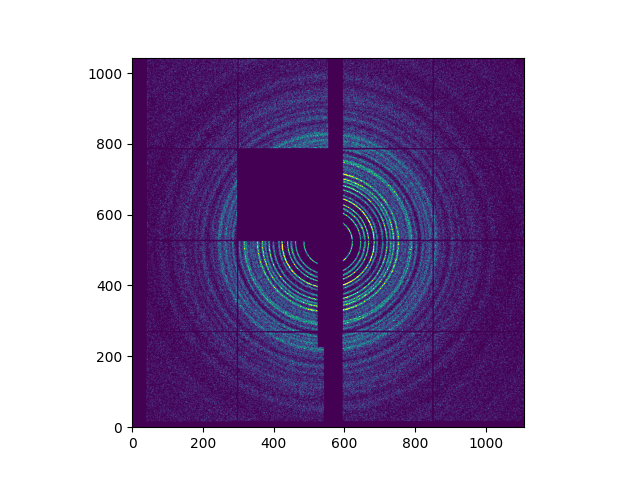

In [105]:
%matplotlib widget
plt.close()
plt.imshow(visual_data, vmax=10, origin="lower")
plt.show()

**Anotate the ring radius, make sure to always look to the same ring for the different distances. I am looking to the first ring, closest to the origin**

In [106]:
peak_position = [(628-485)/2]

## Nominal distance: 100mm

In [107]:
hdf5_file="/path/to/powder_03_100mm_run0001_160us_01-powder.h5"

In [108]:
PF8Config=PF8Info(
        max_num_peaks=20000,
        adc_threshold=0,
        minimum_snr=5,
        min_pixel_count=2,
        max_pixel_count=20000,
        local_bg_radius=3,
        min_res=0,
        max_res=1200
    )

In [109]:
PF8Config.set_geometry_from_file(geometry_filename)

In [110]:
f = h5py.File(hdf5_file, "r")
data = np.array(f["/data/data"], dtype=np.int32)
f.close()

In [111]:
f = h5py.File(PF8Config.bad_pixel_map_filename, "r")
mask = np.array(f[PF8Config.bad_pixel_map_hdf5_path], dtype=np.int32)
f.close()

In [112]:
data_visualize = geometry.DataVisualizer(pixel_maps=PF8Config.pixel_maps)

In [113]:
visual_data = data_visualize.visualize_data(data=data * mask)

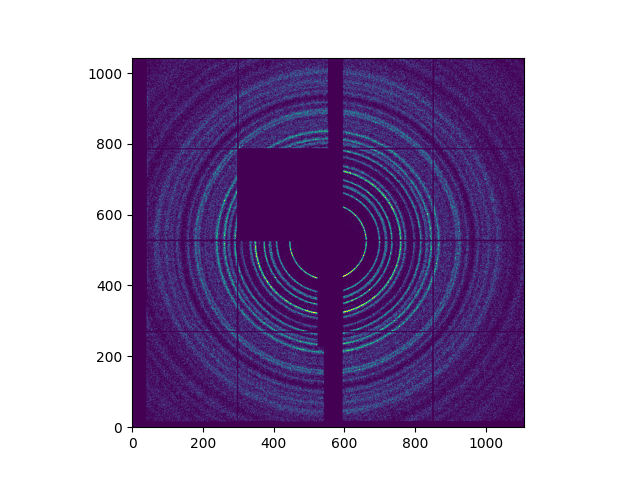

In [114]:
%matplotlib widget
plt.close()
plt.imshow(visual_data, vmax=10, origin="lower")
plt.show()

**Annotate peak position**

In [115]:
peak_position.append((667-445)/2)

In [116]:
peak_position

[71.5, 111.0]

## Nominal distance: 130mm

In [117]:
hdf5_file="/path/to/powder_03_130mm_run0001_160us_01-powder.h5"

In [118]:
PF8Config.set_geometry_from_file(geometry_filename)

In [119]:
f = h5py.File(hdf5_file, "r")
data = np.array(f["/data/data"], dtype=np.int32)
f.close()

In [120]:
f = h5py.File(PF8Config.bad_pixel_map_filename, "r")
mask = np.array(f[PF8Config.bad_pixel_map_hdf5_path], dtype=np.int32)
f.close()

In [121]:
data_visualize = geometry.DataVisualizer(pixel_maps=PF8Config.pixel_maps)

In [122]:
visual_data = data_visualize.visualize_data(data=data * mask)

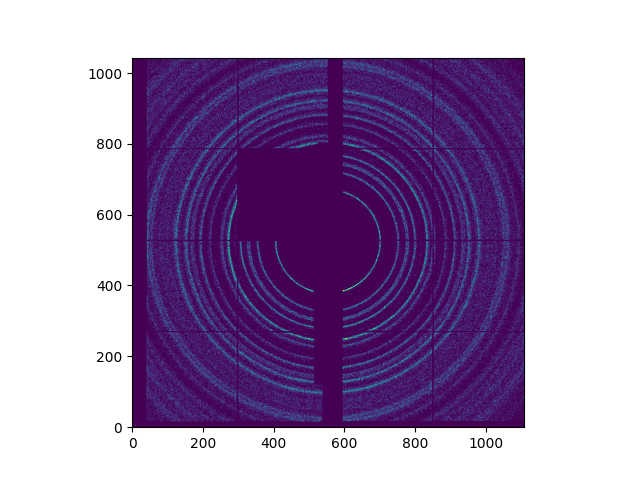

In [123]:
%matplotlib widget
plt.close()
plt.imshow(visual_data, vmax=10, origin="lower")
plt.show()

In [124]:
peak_position.append((707-405)/2)

In [125]:
peak_position

[71.5, 111.0, 151.0]

## Calculating the real distance

In [126]:
x = [(x/peak_position[0])-1 for x in peak_position[1:]]

In [127]:
x

[0.5524475524475525, 1.111888111888112]

In [128]:
y =[30, 60]

In [129]:
from scipy.optimize import curve_fit

def f(x, A, B): 
    return A*x + B

popt, pcov = curve_fit(f, x, y) 

/tmp/ipykernel_68490/969574135.py:6: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = curve_fit(f, x, y)


In [130]:
x_fit=np.linspace(0,1.2,100)

In [131]:
y_fit=f(x_fit, *popt)

Text(0.5, 0, '(yi/y0) -1 ')

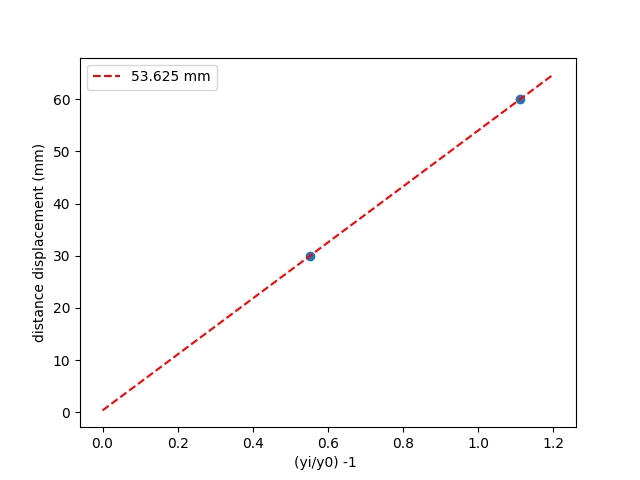

In [132]:
plt.close()
plt.plot(x_fit,y_fit, 'r--', label=f"{round(popt[0],4)} mm")
plt.legend()
plt.scatter(x,y)
plt.ylabel("Detector distance displacement (mm)")
plt.xlabel("(yi/y0) -1 ")

In [133]:
x1 = round(popt[0],4) ## 70 mm

In [134]:
x1

53.625

In [135]:
x2 = x1 + 30 ## 100 mm

In [136]:
x2

83.625

In [137]:
x3 = x1 + 60 ## 130 mm

In [138]:
x3

113.625

**This is an estimate for the real detector distance, which is usually a good starting point for further refinement of the detector geometry using CrystFEL**